In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level):
    x = np.linspace(-10, 10, num_points)
    gaussian_curve = np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    noise = np.random.normal(0, noise_level, num_points)
    
    noisy_gaussian = gaussian_curve + noise
    return x, noisy_gaussian
def plot_gaussians(num_points, mean, std_dev, noise_level):
    x, y = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level)
    plt.plot(x, y)
    plt.show()

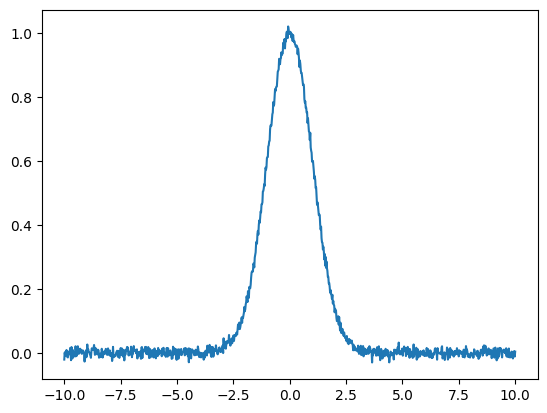

In [18]:
plot_gaussians(1000, 0, 1, 0.01)

In [9]:
# checking auto-corelation and cross-corelation between the generated gaussian curve and itself.
def auto_correlation(num_points, mean, std_dev, noise_level):
    x, y = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level)
    auto_corr = np.correlate(y, y, mode='full')
    plt.plot(auto_corr)
    plt.title("Auto-correlation")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.show()
def cross_correlaiton(y,y2):
    # x, y = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level)
    # x, y2 = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level)
    cross_corr = np.correlate(y, y2, mode='full')
    plt.plot(cross_corr)
    plt.title("Cross-correlation")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.show() 

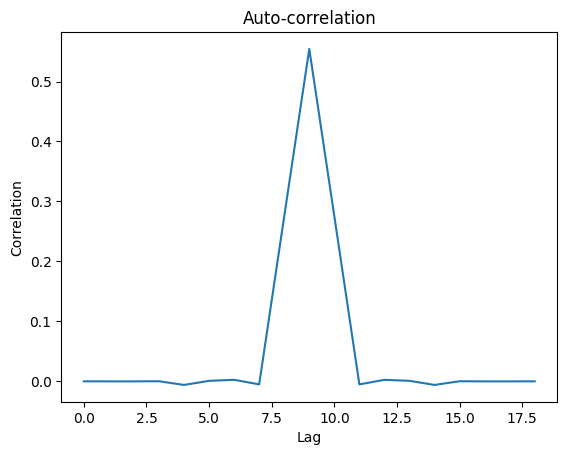

In [29]:
auto_correlation(10, 0, 1, 0.01)
# why is it showing a dependence on the number of points?

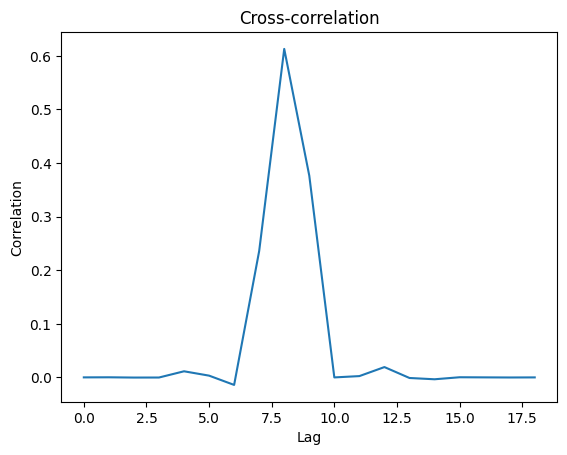

In [27]:
x,y=generate_gaussian_curve_with_noise(10, 0, 1, 0.01)
x,y2=generate_gaussian_curve_with_noise(10,2,1,0.01)
cross_correlaiton(y,y2)
# the peak shifts, to right when one of the gaussians have a negative mean and to the left when one of the gaussians have a positive mean, for only finite
# values of lags, the peak is at the mean difference of the two gaussians, when mean is incresed, then we see multiple peaks.